In [148]:
'''
Link to Wine dataset = https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/
'''

'\nLink to Wine dataset = https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/\n'

In [149]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import requests
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
%matplotlib inline

In [150]:
wine = pd.read_csv('winequality-red.csv',sep=';')

In [151]:
wine.head()
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [152]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [153]:
bins = (2,6.5,8)
group_names = ['bad','good']
wine['quality'] = pd.cut(wine['quality'],bins=bins,labels = group_names)

In [154]:
wine['quality'].unique()

['bad', 'good']
Categories (2, object): ['bad' < 'good']

In [155]:
label_quality = LabelEncoder()

In [156]:
wine['quality'] = label_quality.fit_transform(wine['quality'])

In [157]:
wine['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

<AxesSubplot:xlabel='quality', ylabel='count'>

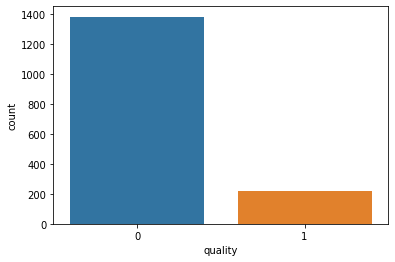

In [158]:
sns.countplot(x=wine['quality'])

In [159]:
X = wine.drop('quality',axis=1)  # Features
y = wine['quality'] # Target

In [160]:
# train and test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42) #randomly selecting which one's to use

In [161]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Random Forest Classifier

In [162]:
rfc = RandomForestClassifier(n_estimators=2000)
rfc.fit(X_train,y_train)
pred_rfc = rfc.predict(X_test)

In [163]:
pred_rfc[:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [164]:
print(classification_report(y_test,pred_rfc))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       273
           1       0.71      0.51      0.59        47

    accuracy                           0.90       320
   macro avg       0.81      0.74      0.77       320
weighted avg       0.89      0.90      0.89       320



In [165]:
print(confusion_matrix(y_test,pred_rfc))
Accuracy = confusion_matrix(y_test,pred_rfc)[1][0]/sum(confusion_matrix(y_test,pred_rfc)[1])
print(f"Accuracy : {Accuracy}")
# The report says that our model made 263 correct predictions and 10 incorrect for bad wine 
# The report says that our model made 23 correct predictions and 24 incorrect for good wine
# This would lead one to say, it isn't a very robust model 

[[263  10]
 [ 23  24]]
Accuracy : 0.48936170212765956


## SVM Classifier

In [166]:
clf = svm.SVC()
clf.fit(X_train,y_train)
clf_pred = clf.predict(X_test)

In [167]:
print(classification_report(y_test,clf_pred))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       273
           1       0.71      0.26      0.37        47

    accuracy                           0.88       320
   macro avg       0.80      0.62      0.65       320
weighted avg       0.86      0.88      0.85       320



In [168]:
# print(confusion_matrix(y_test,clf_pred))
Accuracy = confusion_matrix(y_test,clf_pred)[1][0]/sum(confusion_matrix(y_test,clf_pred)[1])
print(f"Accuracy : {Accuracy}")
# Thus we can see that SVM is faring better than RFC

Accuracy : 0.7446808510638298


Max Accuracy is 0.926829268292683 for 485-th iteration


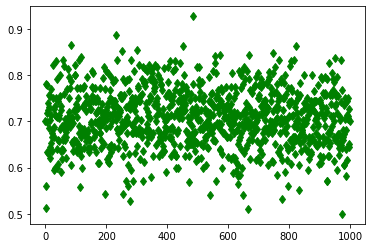

In [190]:
Total_Acc = []
Dictionart_Score = {}
for i in range(1000):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=i,shuffle=True) #randomly selecting which one's to use
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    clf = svm.SVC()
    clf.fit(X_train,y_train)
    clf_pred = clf.predict(X_test)
    Accuracy = confusion_matrix(y_test,clf_pred)[1][0]/sum(confusion_matrix(y_test,clf_pred)[1])
    # print(f"Accuracy : {Accuracy} for {i}th interation")
    plt.plot(i,Accuracy,'gd')
    Total_Acc.append(Accuracy)
print(f"Max Accuracy is {max(Total_Acc)} for {Total_Acc.index(max(Total_Acc))}-th iteration")

In [185]:
Total_Acc.index(0.8648648648648649)

84